# Analysis of Inequities Within San Diego Police Traffic Stops
### Authors: Matin Ghaffari, James Lu

## Introduction and Summary of Finding

&emsp;&emsp;&emsp;Policing has been a topic of discussion in the United States because of various systemic injustices that have been recently brought to the forefront of the media. Often these examples brought to the attention of the public showcase racial bias and police misconduct within our Nation's law enforcement and justice system, strongly suggesting that America's problems with racial inequality still prevail. More specifically, research conducted on data from American law enforcement agencies have shown that Black and Brown people in America face the most disparity in the treatment by law enforcement to the extent that 24 out of 27 studies published on the racial patterns in arrests found that people of color were significantly more likely to be arrested than White people under similar circumstances (Kochel, Chanin). Additionally, many appalling statistics from scholars further demonstrate racial bias in policing. Notably, research conducted by the University of Cincinnati Policing Institute found that “Hispanic, Native American, and Black drivers were 2.4, 2.5, and 2.3 times more likely to be searched compared to Whites after controlling for other legal and extra legal variables” (Engel). <br><br>
&emsp;&emsp;&emsp;With police traffic stops being some of the most frequent interactions that the public has with police, and San Diego being one of America’s largest and most diverse cities, this has motivated our paper which seeks to identify and analyze potential inequities in policing in San Diego, California. The data we used to conduct our analysis is from The Stanford Open Policing Project which contains 382,844 records containing details for police traffic stops in San Diego from December 2013 to March 2017. Ultimately, our findings show that the San Diego Police have a disparate impact against Black and Hispanic individuals. Our analysis showed that Black people are arrested 2 times more often and searched 3 times more often than White people people despite White people accounting for 4 times more total police stops than Black people. Furthermore, Hispanic people are arrested 1.5 times more often and searched 2 times more often than White people people despite White people accounting for 0.25 times more total police stops than Black people.

## The Inequity at Hand And The Historical, Sociological, Economic Context

&emsp;&emsp;&emsp;The historical, sociological, and economic context of discrimination in policing are well documented and in a variety of statistical studies. Historically, discrimination in policing has been an issue for well over 100 years with notable cases including the death of George Floyd, Breonna Taylor, Trayvon Martin, the beating of Rodney King, and the countless other victims that suffered from the same discrimination. The inequity that we observed in our data is differing rates of searches and arrests for different races during police stops. These scenarios can be likened to classification problems, where the police are deciding whether or not to search or arrest an individual. The true value for these classifiers are unknown because if they are not searched it is impossible to know if they have contraband and if they are not arrested we cannot determine if they ‘deserved’ to be arrested. The welfare being distributed in these cases is safety, where police officers maximize societal safety by searching individuals and arresting offenders. However there are allocative and representative harms associated with these processes. Some allocative harms are the loss of privacy and autonomy when an individual is stopped, searched, or arrested. Some representative harms would include stereotyping and negative perception of police. This harmful representation can influence future interactions with law enforcement and lead to more negative encounters. Our inequalities and their notions of welfare should follow Rawlsian fair equality of opportunity (FEO). FEO states that, “those who are at the same level of talent and ability, and have the same willingness to use them, should have the same prospects of success regardless of their initial place in the social system” (Arneson). With FEO as our framework for equality it follows that there should not be a large discrepancy between the search and arrest rates of different races so long as the effort levels are equal. In our scenario effort can be defined as the choice to …, and circumstances are the uncontrollable factors of an individual such as age, race, and gender. In other words, each race should be stopped, searched, and arrested at a similar rate if we quantify effort in the way we did.  

## The Observed Data 

&emsp;&emsp;&emsp;Our dataset was sourced from the Stanford Open Policing Project where they are collecting and standardizing data on vehicular and pedestrian stops from law enforcement. In total they have collected over 200 million records from state and local police departments from all over the country, however for our study we analyzed vehicular and pedestrian stops in San Diego, California. Our dataset contains over 383,000 stops and contains features such as the date, time, area, type of stop, outcome, whether or not a search was conducted, contraband found, and other details for each stop. It also includes features about the individual being stopped such as the age, race, and sex. These features give us a general understanding of the subject being stopped and roughly what occurred during the stop. The features are specific enough to look for…. However, some of the variables in the dataset are biased and poor proxies for what they are actually trying to represent. For example, the variable reason_for_search is entirely in the officer's control when the report is written and what is recorded may not accurately represent the real interaction. Another poorly-defined variable is subject_race because an individual might be reduced to a singular race, and those with a multi-race background are not counted for their other identities. Historically, these categories were created with the goal of subordination which we can still see pervading the justice system today. The data is not a good reflection of crime in San Diego as the social system itself is flawed. The historical roots of discrimination and redlining is … Although the Stanford Open Policing Project is a reputable source, the data that they collect are from official records in each corresponding police department. Each official record can be influenced by politics internally or simply misrecorded. This fact creates inherent bias in the data as there is a certain level of control over what officially goes on record and what may not go on record. Politics also play a large role in these biases as police departments need to maintain a positive image in their communities so instances of poor policing may not be officially recorded.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
sns.set(rc={'figure.figsize':(8,5)})

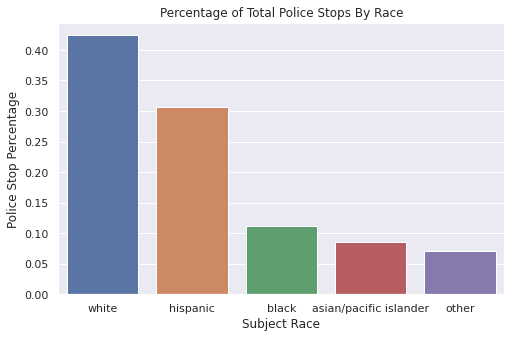

In [18]:
race_pct = data.value_counts('subject_race') / data.shape[0]
sns.barplot(x=race_pct.index, y=race_pct.values,\
            order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'] \
           ).set(xlabel = 'Subject Race', ylabel='Police Traffic Stop Percentage', \
                 title='Percentage of Total Police Traffic Stops By Race');

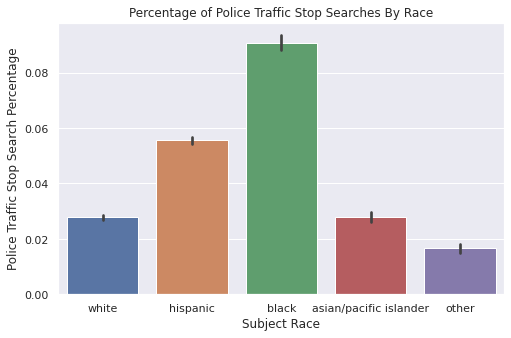

In [21]:
sns.barplot(data=data, x='subject_race', y='search_conducted', \
            order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other']\
           ).set(xlabel = 'Subject Race', ylabel='Police Traffic Stop Search Percentage', \
                 title='Percentage of Police Traffic Stop Searches By Race');

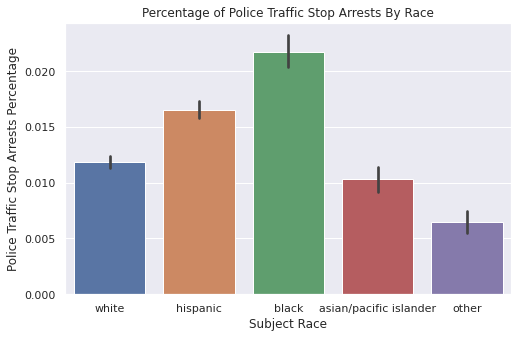

In [23]:
sns.barplot(x='subject_race', y='arrest_made', data = data, \
            order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other']\
           ).set(xlabel = 'Subject Race', ylabel='Police Traffic Stop Arrests Percentage', \
                 title='Percentage of Police Traffic Stop Arrests By Race');

## Quantitative Measures of Fairness

In [51]:
search_pct = data.pivot_table(index='subject_race', values='search_conducted', aggfunc='mean').reset_index()
search_pct.columns = ['subject_race', '% of stops searched']
gb = data.groupby('subject_race')[['arrest_made']].mean().reset_index()

# disparate impact white searches / black searches
ws_bs = search_pct['% of stops searched'][4] / search_pct['% of stops searched'][1]

# disparate impact white searches / hispanic searches
ws_hs = search_pct['% of stops searched'][4] / search_pct['% of stops searched'][2] 

# disparate impact white arrests / black arrests
wa_ba = gb['arrest_made'][4] / gb['arrest_made'][1] 

# disparate impact white arrests / hispanic arrests
wa_ha =  gb['arrest_made'][4] / gb['arrest_made'][2] 


print(f'The disparate impact of Black subject searches vs. White searches    : {ws_bs:.2f}')
print(f'The disparate impact of Black subject arrests vs. White arrests      : {wa_ba:.2f}')
print(f'The disparate impact of Hispanic subject searches vs. White searches : {ws_hs:.2f}')
print(f'The disparate impact of Hispanic subject arrests vs. White arrests   : {wa_ha:.2f}')

The disparate impact of Black subject searches vs. White searches    : 0.31
The disparate impact of Black subject arrests vs. White arrests      : 0.54
The disparate impact of Hispanic subject searches vs. White searches : 0.50
The disparate impact of Hispanic subject arrests vs. White arrests   : 0.72


&emsp;&emsp;&emsp;The measures of fairness that we used in our analysis are demographic parity and equality of odds. Demographic parity is satisfied if for all a, b in the protected attribute, the probability of the predicted variable given a equals the probability of the predicted variable given b. Demographic parity follows the principles of Rawlsian fair equality of opportunity because it implies that each person has an intrinsic constant utility that is independent of effort or circumstances. This concept is necessary because each individual regardless of race deserves an equal right to privacy. We calculated the Demographic parity for searches between White individuals and Black individuals, and White individuals and Hispanic individuals. We chose to use White individuals as the baseline because they were stopped at the highest overall rate and can be considered the majority group. We ultimately found disparate impact for both of our calculations where White individuals and Black individuals had a disparate impact of ~0.3 and White individuals and Hispanic individuals had a disparate impact of ~0.5. 

##  Interpretation of Results and Reasoning Behind These Inequalities

&emsp;&emsp;&emsp;Ultimately, our results strongly suggest that there is a racial bias in the San Diego police department, as our findings show that police traffic stops in San Diego have a disparate impact against Black and Hispanic individuals.  This can largely be explained by poor policing practices and legislation that stem from America’s long history of racial inequalities prompted by 240 years of slavery and 90 years of legalized racial segregation (ACLU). Notably, policing practices became more aggressive on minorities after President Richard Nixon declared the war on drugs in 1971, which led to a series of legislation that has been described as inefficient and racially selective, which consequently marginalized communities of color and made them as scapegoats to the police and public (Webb). As a result, racial bias has been rooted in legislation and policing practices that are applied today. In particular, an example of this is Whren v. United States, 517 U.S. 806 (1996), which was the unanimous supreme court decision that “declared that any traffic offense committed by a driver was a legitimate legal basis for a stop" (Cornell). This supreme court decision showed the lack of concern policy makers have for inequalities towards minority groups, since such legislation provides police with the excuse and ease of ability to racial profile over inconsequential infractions such as a broken tail light. This coincides with our findings since the data shows that Black people are arrested 2 times more often and searched 3 times more often than White people despite White people accounting for 4 times more total police stops than Black people. This disparity corresponds to the aforementioned racially biased policing practices, as this shows that officers are using such laws to easily target minorities and influence unfair and racially motivated stops, searches, and arrests which have had an disparate impact on Black and Hispanic people in San Diego.  


## Works Cited

Arneson, R. (2015, March 25). Equality of opportunity. Stanford Encyclopedia of Philosophy. Retrieved April 29, 2022, from https://plato.stanford.edu/entries/equal-opportunity/ <br><br>
Chanin, J., Welsh, M., & Nurge, D. (2018). Traffic enforcement through the lens of Race: A sequential analysis of ...Retrieved from https://spa.sdsu.edu/documents/Traffic_enforcement.pdf <br><br>
Engel, R. S., Cherkauskas, J. C., Smith, M. R., Lytle, D., & Moore, K. (2009, November 1). Traffic Stop Data Analysis Study: Year 3 Final Report. azdps. Retrieved from https://www.azdps.gov/sites/default/files/media/Traffic_Stop_Data_Report_2009.pdf <br><br>
Kochel, T. R., Wilson, D. B., & Mastrofski, S. D. (2011). Effect of suspect race on officers’ arrest decisions. Criminology, 49, 473-512.<br><br>
Racial profiling. American Civil Liberties Union. (2022, February 15). Retrieved May 1, 2022, from https://www.aclu.org/issues/racial-justice/race-and-criminal-justice/racial-profiling <br><br>
Schroeder,  L., & Lopez-Villafaña, A. (2020, September 11). Could you live here? Decades-old redlining still shapes San Diego's neighborhoods today, Advocates say. Tribune. Retrieved May 7, 2022, from https://www.sandiegouniontribune.com/communities/san-diego/story/2020-09-11/could-you-live-here-decades-old-redlining-still-shapes-san-diegos-neighborhoods-today-advocates-say <br><br>
Webb, G. L., & Brown, M. P. (1998). United States drug laws and institutionalized discrimination (from new war on drugs: Symbolic politics and criminal justice policy, P 45-58, 1998, Eric L. Jensen and Jurg Gerber, eds. -- see NCJ-170568). United States Drug Laws and Institutionalized Discrimination (From New War on Drugs: Symbolic Politics and Criminal Justice Policy, P 45-58, 1998, Eric L. Jensen and Jurg Gerber, eds. -- See NCJ-170568) | Office of Justice Programs. Retrieved May 7, 2022, from https://www.ojp.gov/ncjrs/virtual-library/abstracts/united-states-drug-laws-and-institutionalized-discrimination-new 